# High-order polynomial models practice

We use higher-order polynomials to achieve an exact fit to a data set. Given a data set with $m$ points, a polynomial of degree $p=m-1$ can be adjusted to fit the data exactly.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Lab quiz 5

You will be setting up and fitting two polynomial models to different datasets in Lab Quiz 5. Please use the notebook `HighOrderPolynomials.ipynb` as a reference for setting up and fitting the polynomial models.

## 1. Four data points

Given the four data points

| $x$ | $y$ |
|---|---|
| -4| 0 |
| -2| 4 |
| -1| -1|
|1 | 1 |

Formulate an exact polynomial model and fit it to the data.

In [9]:
x1 = np.array([-4,-2,-1,1])
y1 = np.array([0,4,-1,1])
n1 = len(x1)

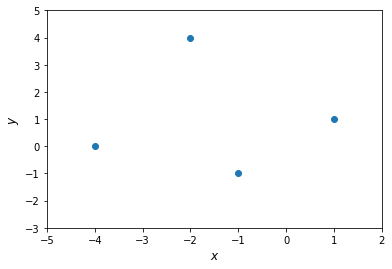

In [8]:
plt.plot(x1, y1, 'o')
plt.xlim(-5,2)
plt.ylim(-3,5)
plt.xlabel(r'$x$',fontsize=12)
plt.ylabel(r'$y$',fontsize=12);

### As a matrix equation

Four data points can be modeled exactly using a third degree polynomial $p=4-1=3$

$$ y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 $$

We need to solve the matrix equation

$$ \hat{A} \vec{a} = \vec{b} $$

where $\hat{A}$ is a square 4x4 matrix, $\vec{a}$ is $(a_0,a_1,a_2,a_3)$, and $\vec{b}$ is a vector of data points (y values). 

For this problem

$$ \hat{A} = \begin{pmatrix} (-4)^0 & (-4)^1 & (-4)^2 & (-4)^3 \\
                             (-2)^0 & (-2)^1 & (-2)^2 & (-2)^3 \\
                             (-1)^0 & (-1)^1 & (-1)^2 & (-1)^3 \\
                             (1)^0 & (1)^1 & (1)^2 & (1)^3 \end{pmatrix}$$
$$ \vec{b}^T = \left( 0,4,-1,1 \right) $$
 
Set up the matrix problem in `numpy`.

In [12]:
Amx1 = np.empty((n1,n1))
bvec1 = y1

Set up the elements of `Amx1` using nested `for` loops

In [13]:
for i in range(0,n1):
    for j in range(0,n1):
        Amx1[i,j] = x1[i]**float(j)

Check the A matrix

In [14]:
print(Amx1)

[[  1.  -4.  16. -64.]
 [  1.  -2.   4.  -8.]
 [  1.  -1.   1.  -1.]
 [  1.   1.   1.   1.]]


`np.linalg.inv` to take a matrix inverse. Matrix multiplication is done either with `np.dot` or with the `@` symbol.

Here we know that 

$$ \vec{a} = \hat{A}^{-1} \vec{b} $$

In [15]:
avec1 = np.linalg.inv(Amx1) @ bvec1

In [16]:
print(avec1)

[-3.73333333  0.13333333  3.73333333  0.86666667]


Check the predictions using a graph to make sure these coefficients have been computed correctly

In [17]:
npred1 = 50
xpred1 = np.linspace(-5,2,num=npred1)
ypred1 = np.empty(npred1)
for i in range(0,npred1):
    ypred1[i] = 0.0
    for j in range(0,n1):
        ypred1[i] += avec1[j]*xpred1[i]**float(j)

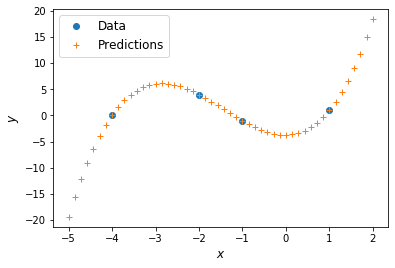

In [18]:
plt.plot(x1, y1, 'o', label='Data')
plt.plot(xpred1, ypred1, '+', label='Predictions')
plt.xlabel(r'$x$',fontsize=12)
plt.ylabel(r'$y$',fontsize=12)
plt.legend(fontsize=12);

## 2. Six data points

Given the six data points

| $x$ | $y$ |
|---|---|
| -4| 0 |
| -2| 4 |
| -1| -1|
| -0.5 | 2|
|1 | 1 |
| 2| 7 |


Formulate an exact polynomial model and fit it to the data.

In [19]:
x2 = np.array([-4,-2,-1,-0.5,1,2])
y2 = np.array([0,4,-1,2,1,7])
n2 = len(x2)

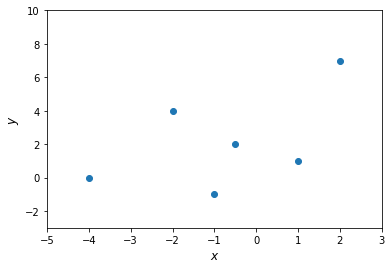

In [20]:
plt.plot(x2, y2, 'o')
plt.xlim(-5,3)
plt.ylim(-3,10)
plt.xlabel(r'$x$',fontsize=12)
plt.ylabel(r'$y$',fontsize=12);

In [22]:
Amx2 = np.empty((n2,n2))
bvec2 = y2

In [23]:
for i in range(0,n2):
    for j in range(0,n2):
        Amx2[i,j] = x2[i]**float(j)

In [25]:
avec2 = np.linalg.inv(Amx2) @ bvec2

In [26]:
print(avec2)

[ 4.60634921  2.8515873  -6.21626984 -2.29365079  1.60992063  0.44206349]


In [30]:
npred2 = 100
xpred2 = np.linspace(-5,3,num=npred2)
ypred2 = np.empty(npred2)
for i in range(0,npred2):
    ypred2[i] = 0.0
    for j in range(0,n2):
        ypred2[i] += avec2[j]*xpred2[i]**float(j)

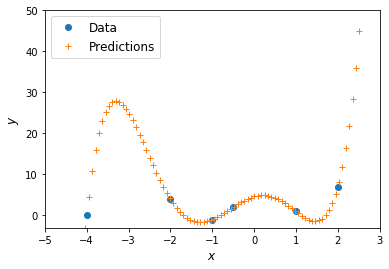

In [33]:
plt.plot(x2, y2, 'o', label='Data')
plt.plot(xpred2, ypred2, '+', label='Predictions')
plt.xlim(-5,3)
plt.ylim(-3,50)
plt.xlabel(r'$x$',fontsize=12)
plt.ylabel(r'$y$',fontsize=12)
plt.legend(fontsize=12);